## Data visulization + Data Processing

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
import yfinance as yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

In [ ]:
stock_list = ["TSLA","BYDDY","BMWYY","VWAGY","TM"]

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [TSLA, BYDDY, BMWYY, VWAGY, TM]
company_name = ["TESLA","BYD","BMW","VOLKSWAGEN","TOYOTA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.reset_index(inplace=True)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,company_name
12575,2023-07-21,163.580002,163.679993,162.600006,162.809998,162.809998,214400,TOYOTA
12576,2023-07-24,164.580002,164.919998,164.250000,164.529999,164.529999,212100,TOYOTA
12577,2023-07-25,165.000000,165.800003,164.740005,165.559998,165.559998,233300,TOYOTA
12578,2023-07-26,165.160004,166.020004,164.880005,165.699997,165.699997,162300,TOYOTA
12579,2023-07-27,165.869995,166.729996,165.380005,165.429993,165.429993,182200,TOYOTA
12580,2023-07-28,167.100006,167.800003,166.690002,167.149994,167.149994,292200,TOYOTA
12581,2023-07-31,168.000000,168.570007,167.809998,168.240005,168.240005,201300,TOYOTA
12582,2023-08-01,171.119995,172.360001,170.550003,171.839996,171.839996,526000,TOYOTA
12583,2023-08-02,173.960007,175.369995,173.190002,173.850006,173.850006,420200,TOYOTA
12584,2023-08-03,168.429993,168.699997,166.740005,168.570007,168.570007,421600,TOYOTA


In [ ]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,84.597311,86.491461,82.547552,84.570285,84.570285,1.153611e+08
std,105.267753,107.670624,102.594749,105.166584,105.166584,7.792876e+07
min,7.958667,8.181333,7.740000,8.033333,8.033333,1.062000e+07
25%,15.254000,15.458667,14.990667,15.232667,15.232667,6.643230e+07
50%,20.783333,21.090000,20.371332,20.734667,20.734667,9.290520e+07
75%,168.410004,174.300003,166.190002,168.539993,168.539993,1.374255e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-08-05 to 2023-08-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Adj Close     2517 non-null   float64
 5   Volume        2517 non-null   int64  
 6   company_name  2517 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 157.3+ KB


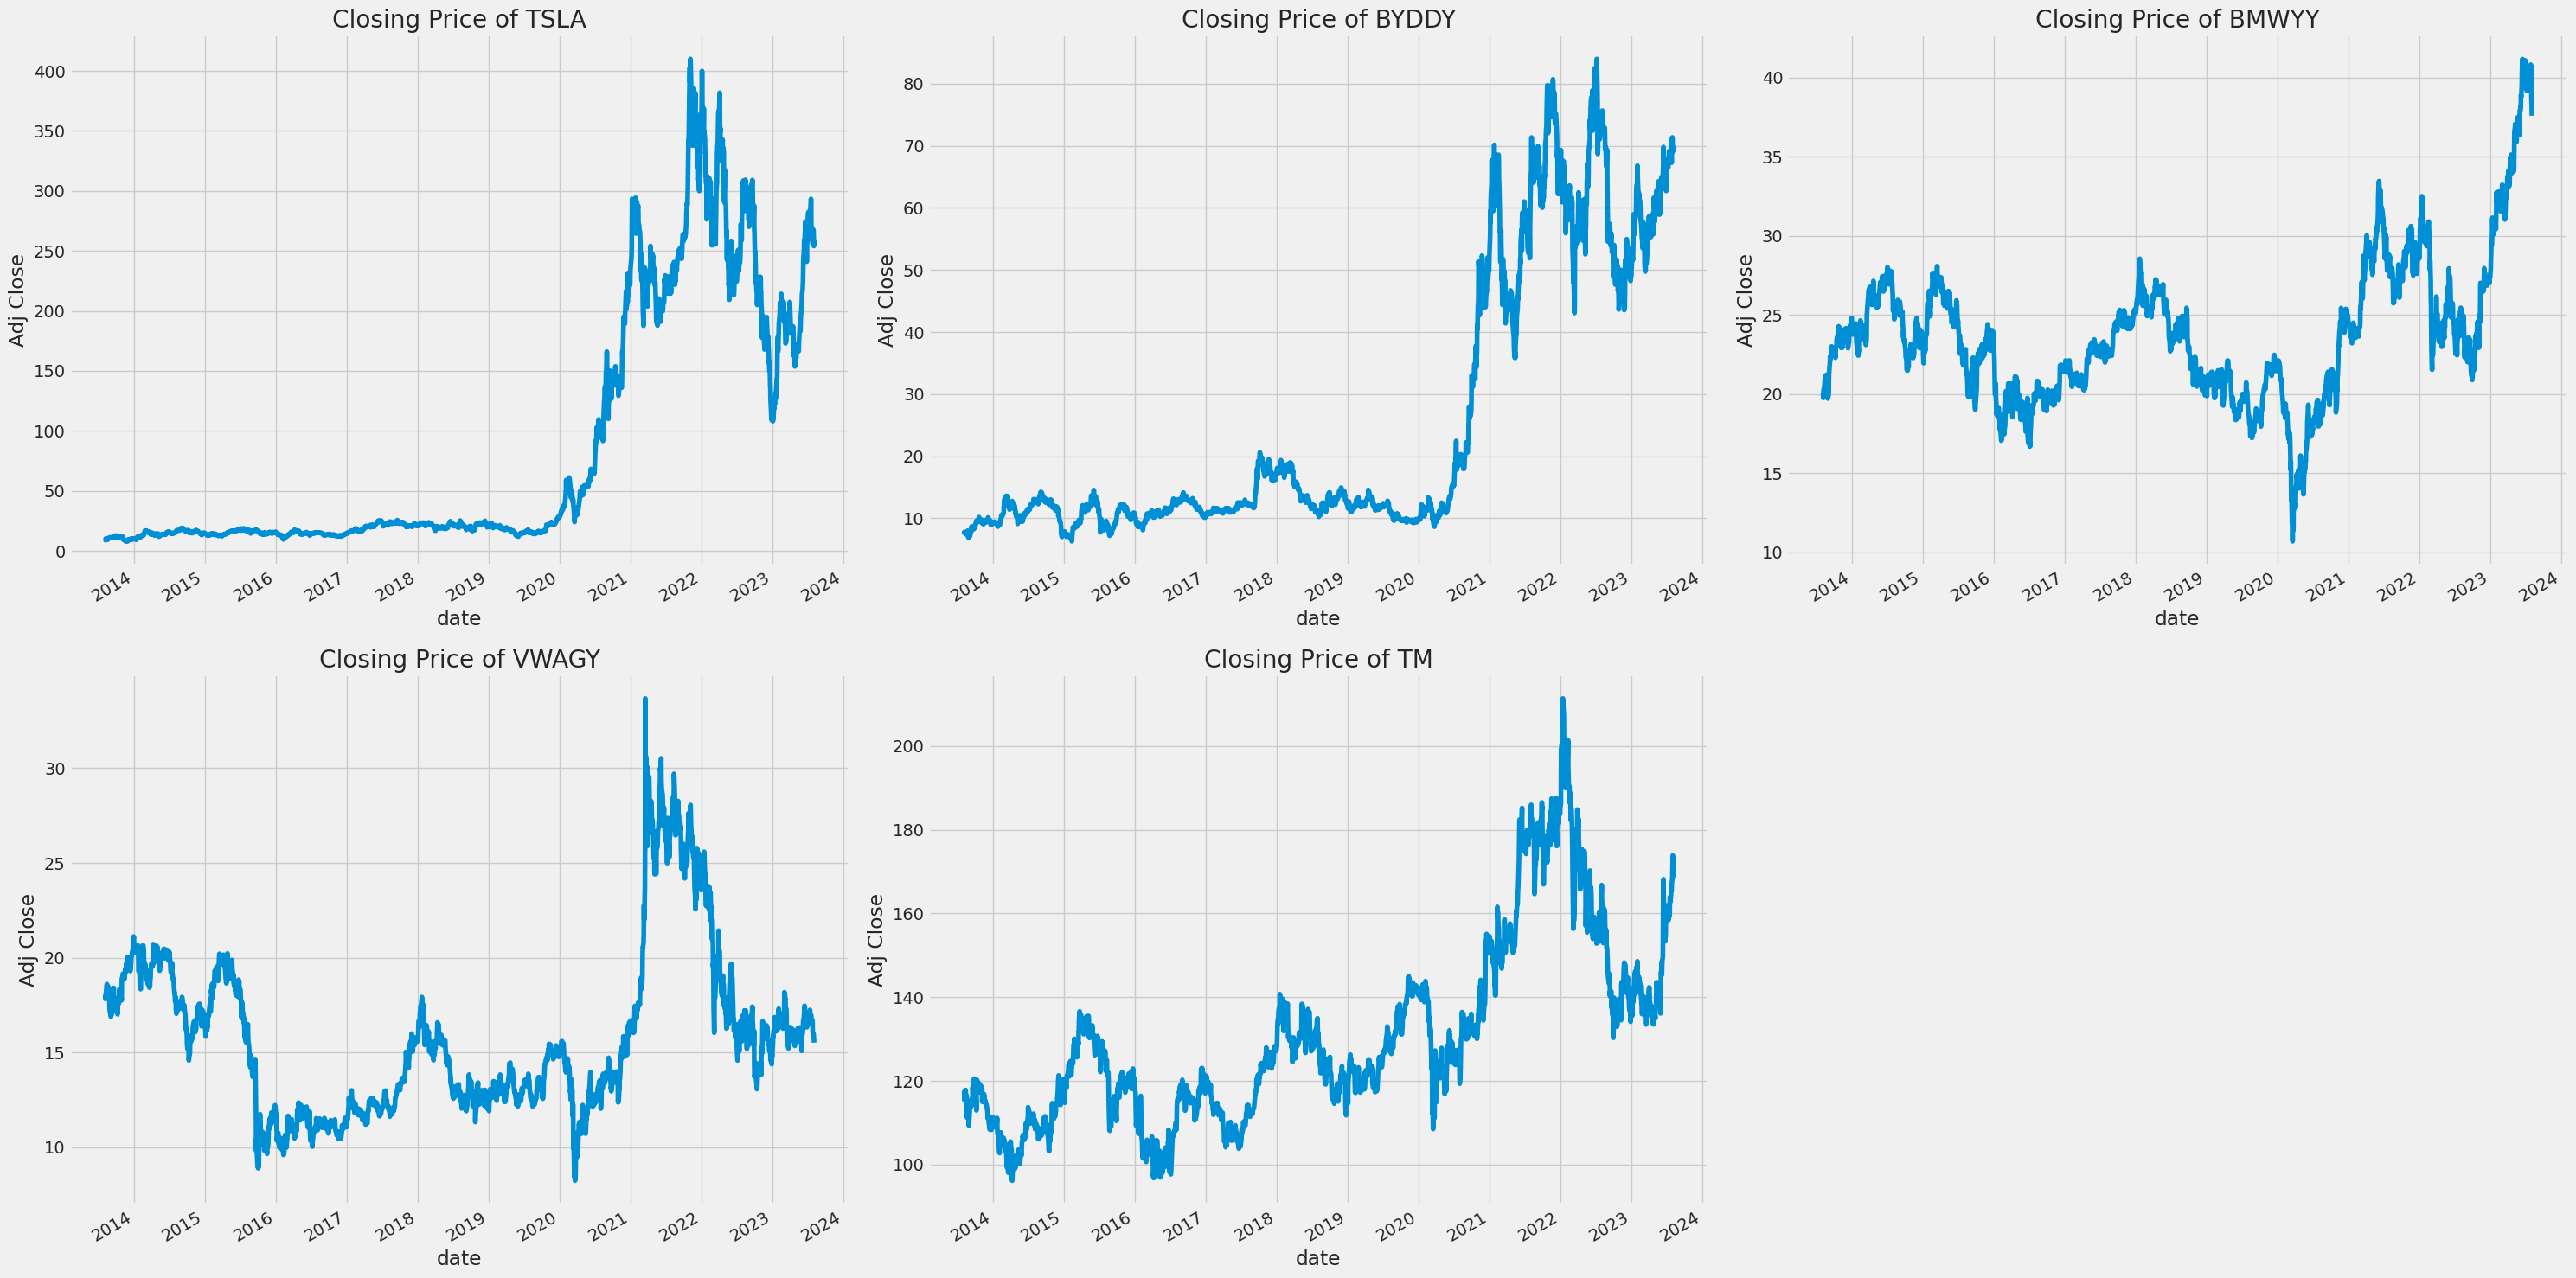

In [ ]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,3,i)
    company["Adj Close"].plot()

    plt.xlabel("date")
    plt.ylabel("Adj Close")
    plt.title(f"Closing Price of {stock_list[i-1]}")

plt.tight_layout()

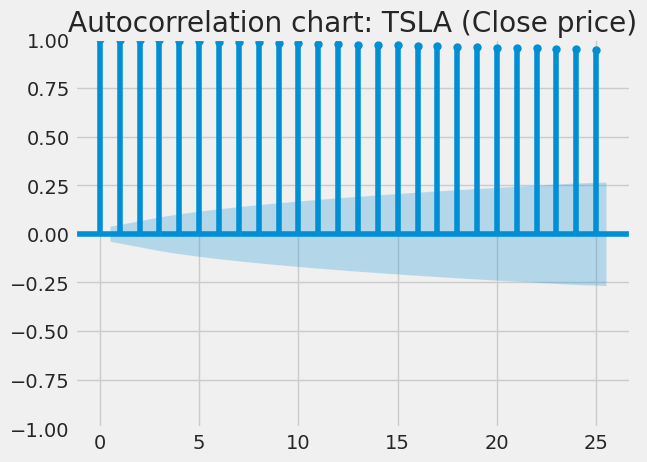

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(TSLA["Close"],lags=25,title="Autocorrelation chart: TSLA (Close price)")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


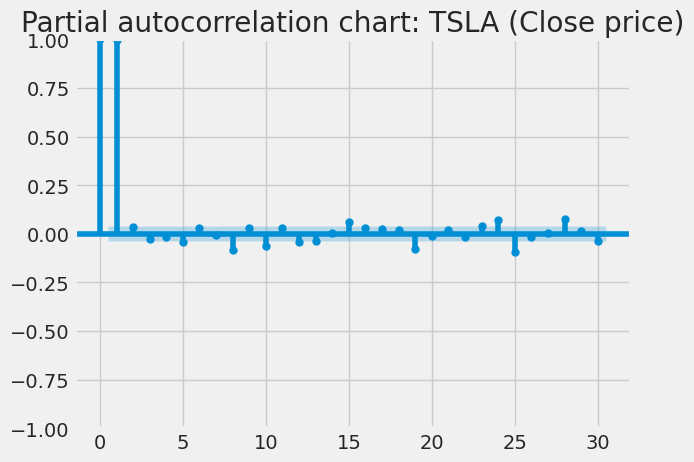

In [ ]:
plot_pacf(TSLA["Close"],lags=30,title="Partial autocorrelation chart: TSLA (Close price)")
plt.show()

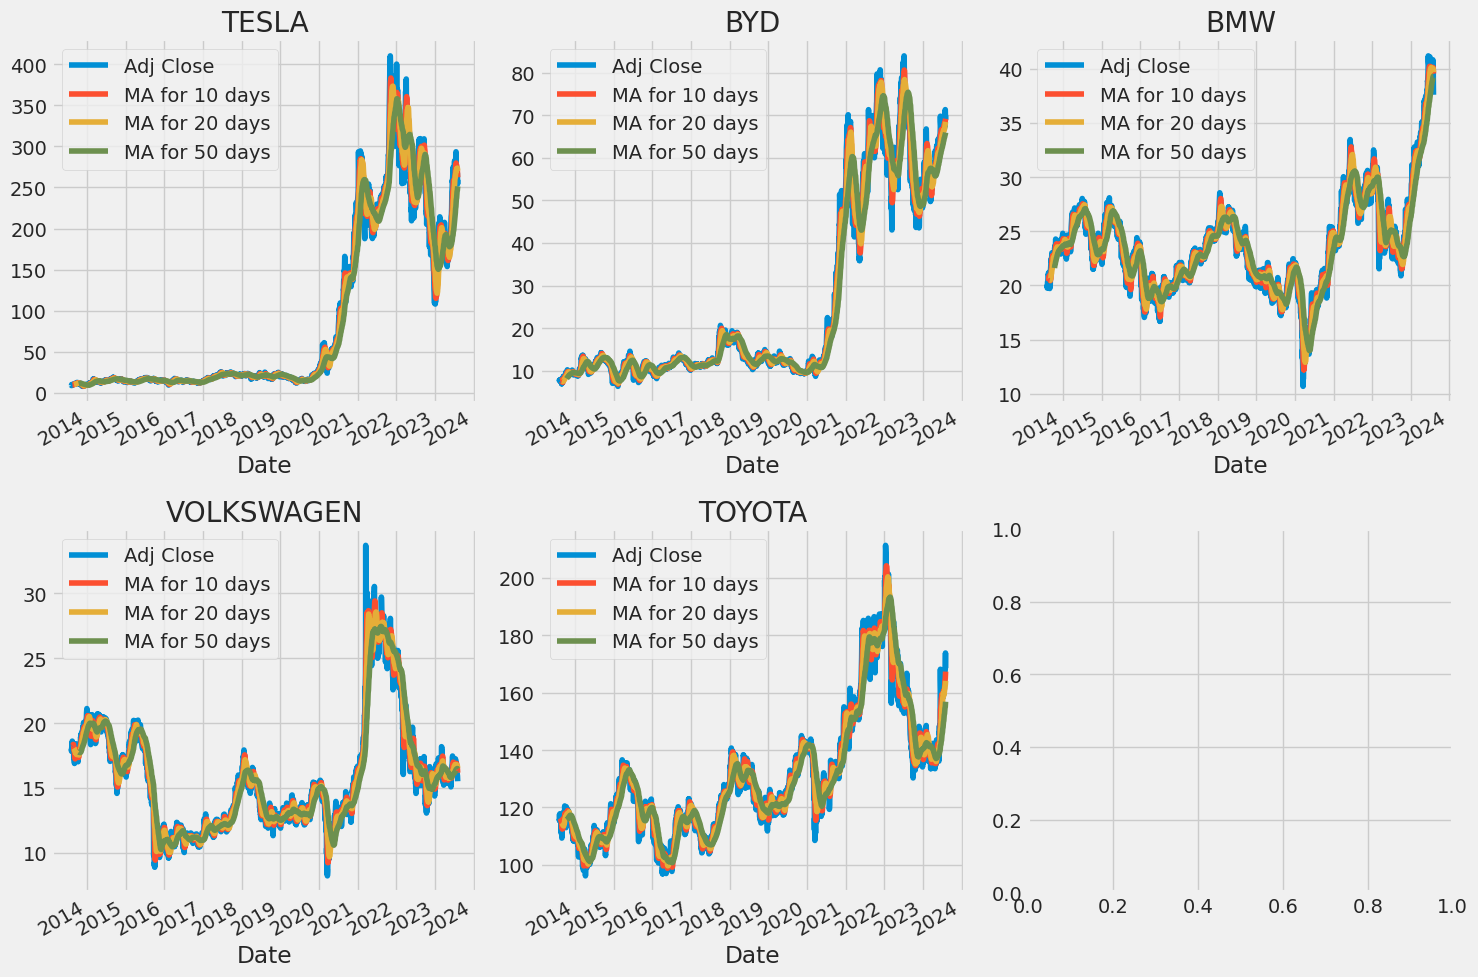

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("TESLA")

BYDDY[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("BYD")

BMWYY[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[0,2])
axes[0,2].set_title("BMW")

VWAGY[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title("VOLKSWAGEN")

TM[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("TOYOTA")

fig.tight_layout()

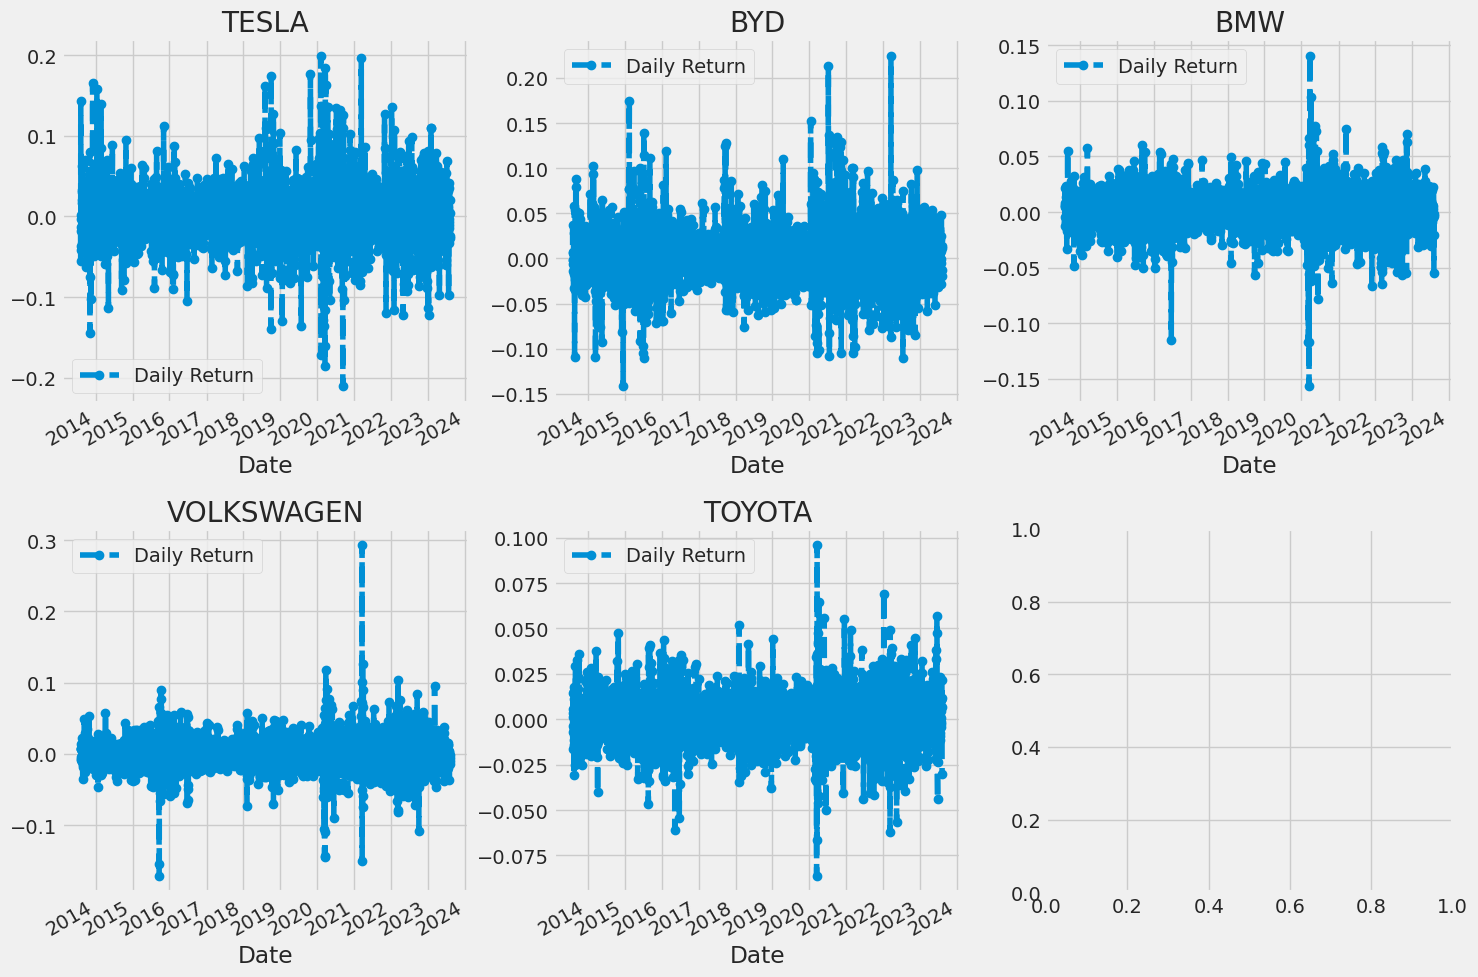

In [ ]:
for company in company_list:
    company["Daily Return"] = company["Adj Close"].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA["Daily Return"].plot(ax=axes[0,0],legend=True,linestyle="--",marker="o")
axes[0,0].set_title("TESLA")

BYDDY["Daily Return"].plot(ax=axes[0,1],legend=True,linestyle="--",marker="o")
axes[0,1].set_title("BYD")

BMWYY["Daily Return"].plot(ax=axes[0,2],legend=True,linestyle="--",marker="o")
axes[0,2].set_title("BMW")

VWAGY["Daily Return"].plot(ax=axes[1,0],legend=True,linestyle="--",marker="o")
axes[1,0].set_title("VOLKSWAGEN")

TM["Daily Return"].plot(ax=axes[1,1],legend=True,linestyle="--",marker="o")
axes[1,1].set_title("TOYOTA")

fig.tight_layout()

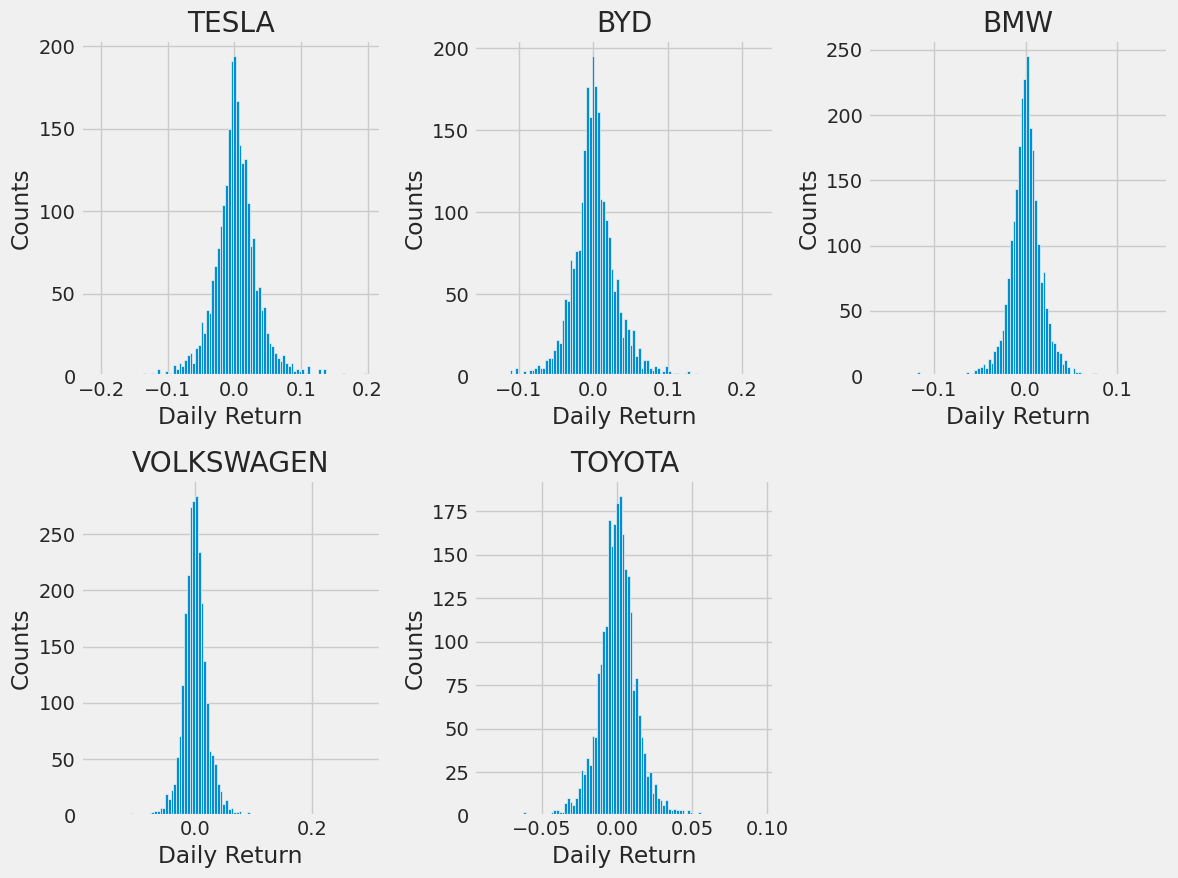

In [ ]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list,1):
    plt.subplot(2,3,i)
    company["Daily Return"].hist(bins=100)
    plt.xlabel("Daily Return")
    plt.ylabel("Counts")
    plt.title(f"{company_name[i-1]}")

plt.tight_layout()

In [ ]:
closing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)["Adj Close"]

stock_rets = closing_df.pct_change()
stock_rets.head()

[*********************100%***********************]  5 of 5 completed


,BMWYY,BYDDY,TM,TSLA,VWAGY
Date,,,,,
2013-08-05,NaN,NaN,NaN,NaN,NaN
2013-08-06,-0.012841,0.037614,0.001467,-0.017487,-0.003865
2013-08-07,-0.004124,-0.013750,-0.016500,-0.055716,-0.008146
2013-08-08,0.021663,0.007604,0.003685,0.143411,0.008861
2013-08-09,0.005613,0.006289,-0.003593,-0.003127,0.007498


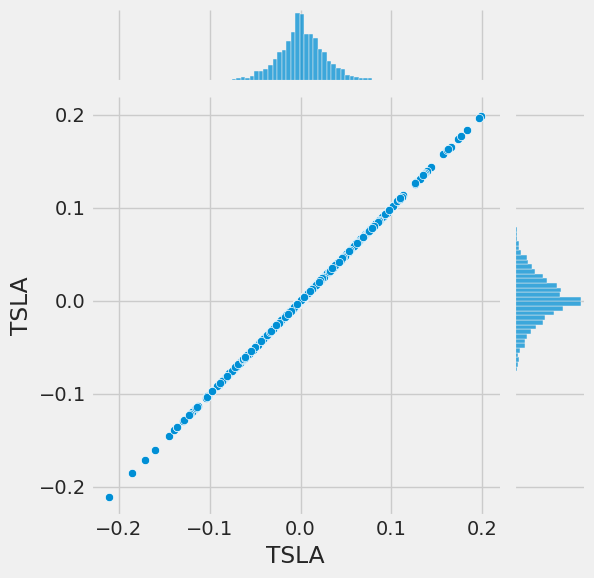

In [ ]:
sns.jointplot(x="TSLA", y="TSLA", data=stock_rets, kind="scatter")

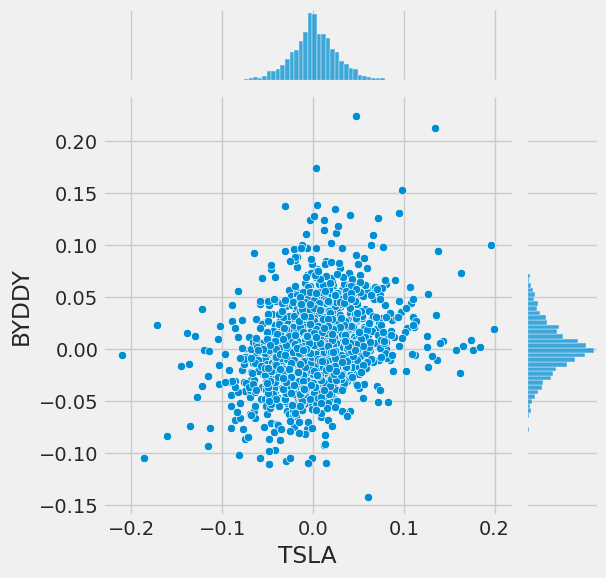

In [ ]:
sns.jointplot(x="TSLA", y="BYDDY", data=stock_rets, kind="scatter")

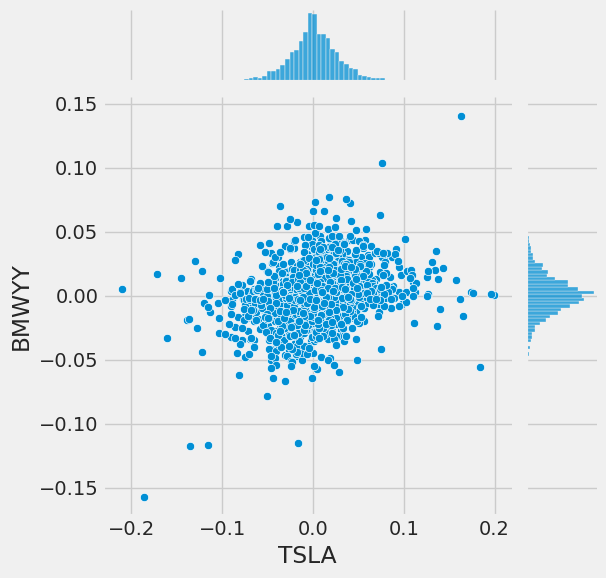

In [ ]:
sns.jointplot(x="TSLA", y="BMWYY", data=stock_rets, kind="scatter")

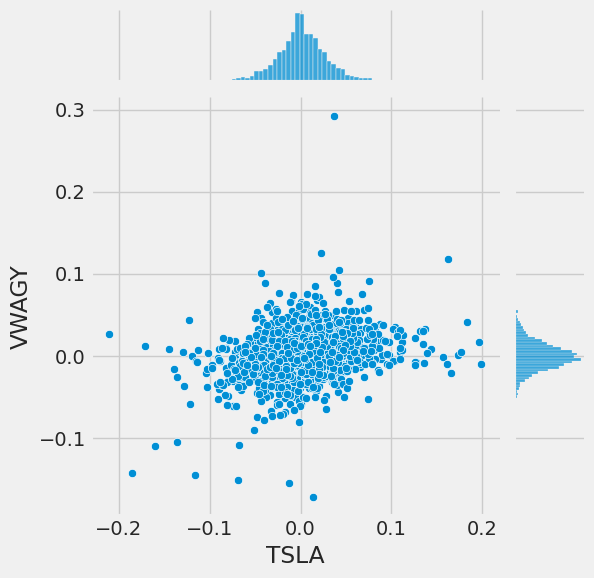

In [ ]:
sns.jointplot(x="TSLA", y="VWAGY", data=stock_rets, kind="scatter")

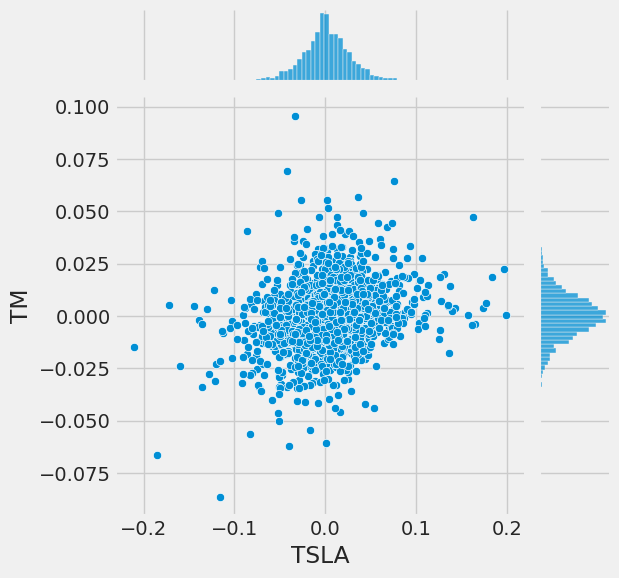

In [ ]:
sns.jointplot(x="TSLA", y="TM", data=stock_rets, kind="scatter")

Text(0.5, 1.0, 'Correlation of closing price')

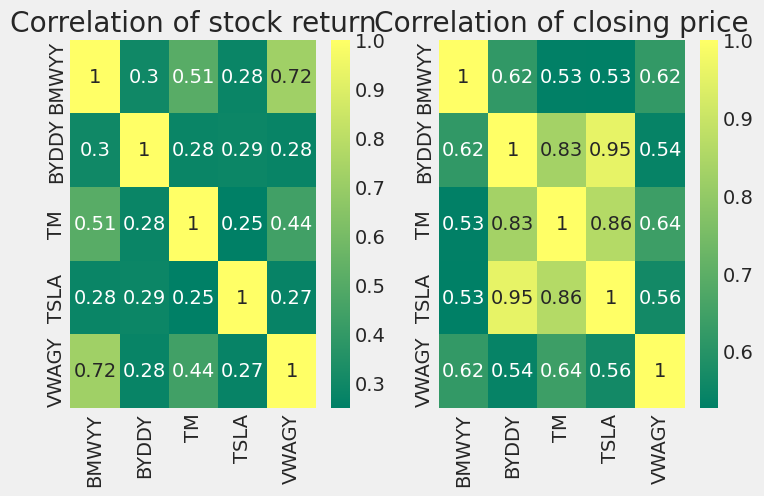

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
sns.heatmap(stock_rets.corr(),annot=True, cmap="summer")
plt.title("Correlation of stock return")

plt.subplot(2,3,2)
sns.heatmap(closing_df.corr(),annot=True, cmap="summer")
plt.title("Correlation of closing price")

In [ ]:
rets = stock_rets.dropna()

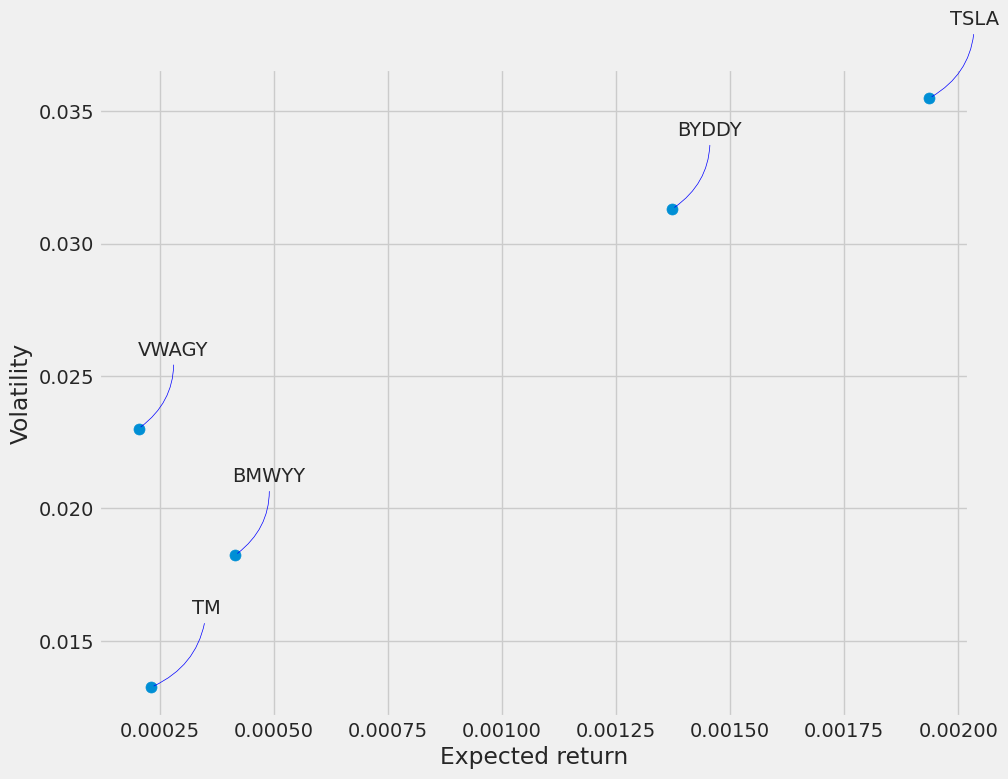

In [ ]:
area = np.pi * 20
plt.figure(figsize=(10,8))
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected return")
plt.ylabel("Volatility")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords="offset points", ha="right", va="bottom",
                 arrowprops=dict(arrowstyle="-",color="blue",connectionstyle="arc3,rad=-0.3"))

In [ ]:
cov_matrix = rets.cov()
cov_matrix

,BMWYY,BYDDY,TM,TSLA,VWAGY
BMWYY,0.000333,0.000170,0.000123,0.000182,0.000302
BYDDY,0.000170,0.000980,0.000116,0.000318,0.000198
TM,0.000123,0.000116,0.000175,0.000117,0.000135
TSLA,0.000182,0.000318,0.000117,0.001260,0.000221
VWAGY,0.000302,0.000198,0.000135,0.000221,0.000530


In [ ]:
avg_rets = rets.mean()

weights = np.array([0.2,0.2,0.2,0.2,0.2])

port_mean = avg_rets.dot(weights)

port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

initial_investment = 1000000

mean_investment = (1+port_mean) * initial_investment

stdev_investment = initial_investment * port_stdev

In [ ]:
conf_level1 = 0.05

from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
var_1d1 = initial_investment - cutoff1
var_1d1

26772.83867350896

Here we are saying with 95% confidence that our portfoloa of 1M USD will not exceed losses greater than 26.8k USD over a one day period.

# **Model Selection**

# XGboost

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
ticker_symbol = 'BYDDY'
df = yf.download(ticker_symbol, start="2013-07-25", end="2023-07-25")
df.reset_index(inplace=True)
print(df)

[*********************100%***********************]  1 of 1 completed
           Date       Open       High        Low      Close  Adj Close  Volume
0    2013-07-25   8.200000   8.260000   8.200000   8.260000   8.013925   28200
1    2013-07-26   8.250000   8.250000   8.020000   8.100000   7.858691  114200
2    2013-07-29   7.910000   7.990000   7.910000   7.970000   7.732564   25100
3    2013-07-30   7.980000   8.020000   7.950000   7.990000   7.751968    1700
4    2013-07-31   7.910000   7.910000   7.740000   7.750000   7.519118   46800
...         ...        ...        ...        ...        ...        ...     ...
2511 2023-07-18  67.760002  68.089996  67.099998  67.470001  67.470001  192700
2512 2023-07-19  68.480003  68.610001  67.730003  68.330002  68.330002  127700
2513 2023-07-20  68.500000  68.500000  67.949997  68.019997  68.019997   99700
2514 2023-07-21  68.129997  68.400002  67.730003  67.989998  67.989998   65000
2515 2023-07-24  66.900002  68.739998  66.400002  68.550003  6

In [ ]:
X = df[['High', 'Low', 'Open', 'Volume']]
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score: {:.2f}".format(r2))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

R-squared (R2) Score: 1.00
Mean Squared Error: 0.12


In [ ]:
rmse = np.sqrt(mse)
rmse

0.3393225937248319

# KNN

In [ ]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
ticker_symbol = 'BYDDY'
data = yf.download(ticker_symbol, start="2013-07-25", end="2023-07-25")
data.reset_index(inplace=True)
print(data)
data.describe()

[*********************100%***********************]  1 of 1 completed
           Date       Open       High        Low      Close  Adj Close  Volume
0    2013-07-25   8.200000   8.260000   8.200000   8.260000   8.013925   28200
1    2013-07-26   8.250000   8.250000   8.020000   8.100000   7.858690  114200
2    2013-07-29   7.910000   7.990000   7.910000   7.970000   7.732564   25100
3    2013-07-30   7.980000   8.020000   7.950000   7.990000   7.751967    1700
4    2013-07-31   7.910000   7.910000   7.740000   7.750000   7.519118   46800
...         ...        ...        ...        ...        ...        ...     ...
2511 2023-07-18  67.760002  68.089996  67.099998  67.470001  67.470001  192700
2512 2023-07-19  68.480003  68.610001  67.730003  68.330002  68.330002  127700
2513 2023-07-20  68.500000  68.500000  67.949997  68.019997  68.019997   99700
2514 2023-07-21  68.129997  68.400002  67.730003  67.989998  67.989998   65000
2515 2023-07-24  66.900002  68.739998  66.400002  68.550003  6

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,25.359869,25.607536,25.079877,25.345362,25.086797,101175.039746
std,21.851862,22.095144,21.572213,21.839698,21.800507,108145.002527
min,6.500000,6.510000,6.450000,6.480000,6.295488,300.000000
25%,11.130000,11.237500,11.045000,11.167500,10.923652,25975.000000
50%,12.780000,12.880000,12.670000,12.770000,12.532686,62300.000000
75%,45.867500,46.245001,45.052500,45.532500,45.239096,140525.000000
max,83.699997,84.879997,82.989998,84.419998,83.985497,887000.000000


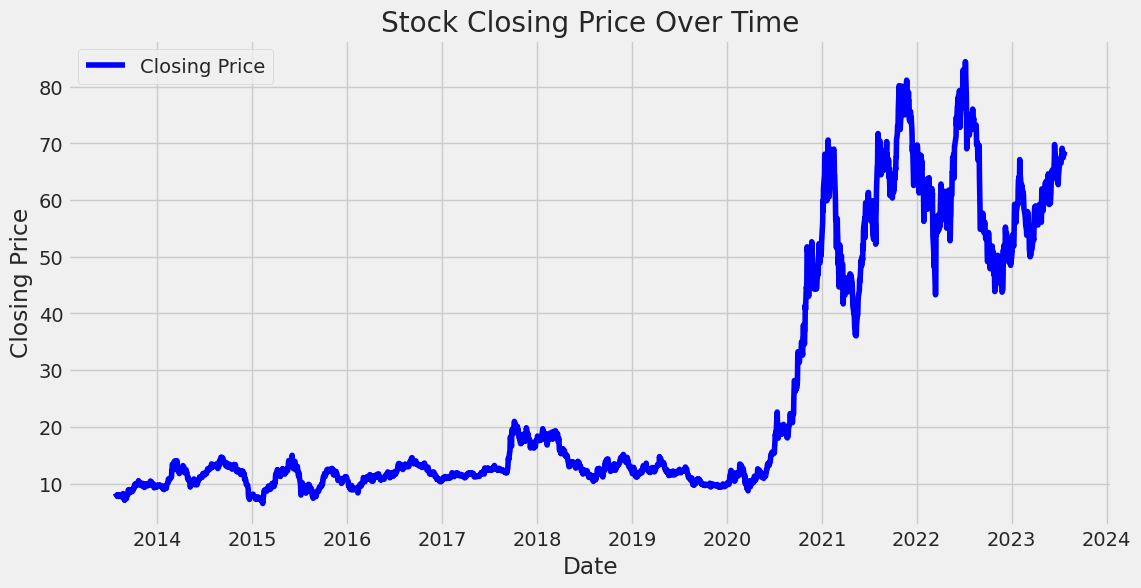

In [ ]:
import matplotlib.pyplot as plt
data["Date"]=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index=data['Date']
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
X = data[['High', 'Low', 'Open', 'Volume']]
y = data['Close']
tscv = TimeSeriesSplit(n_splits=4)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None)

In [ ]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

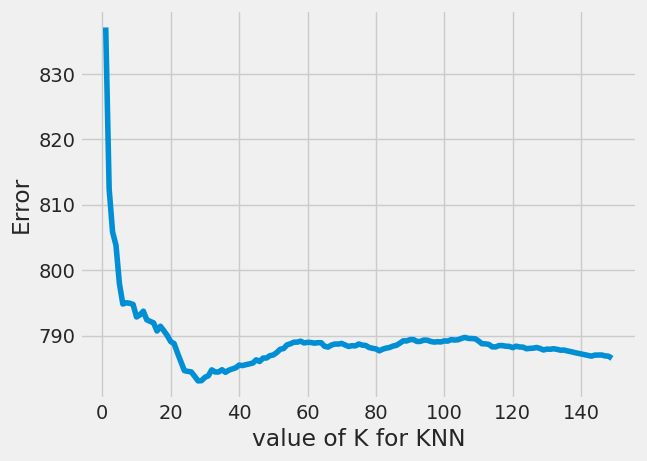

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
k_range = range(1,150)
k_error = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    errors = 1 - cross_val_score(knn, X, y, cv=3, scoring='neg_mean_squared_error')
    k_error.append(np.mean(errors))

plt.plot(k_range, k_error)
plt.xlabel('value of K for KNN')
plt.ylabel('Error')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': k_range}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=149),
             param_grid={'n_neighbors': range(1, 150)},
             scoring='neg_mean_squared_error')

In [ ]:
from sklearn.metrics import mean_squared_error
best_k = grid_search.best_params_['n_neighbors']
best_k

33

In [ ]:
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=33)

In [ ]:
y_pred = best_knn.predict(X_test_scaled)

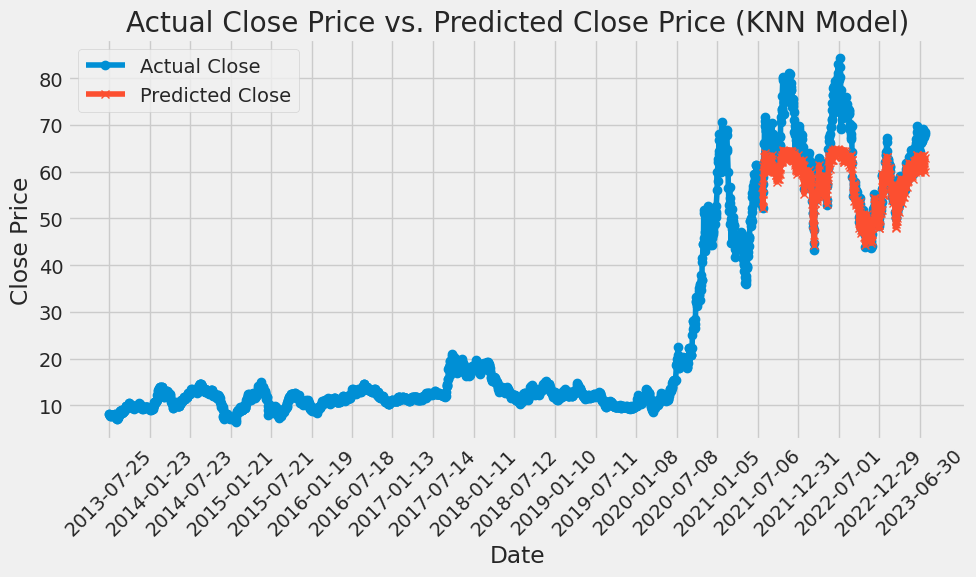

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Close', marker='o')
plt.plot(data['Date'][len(data)-len(y_test):], y_pred, label='Predicted Close', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Close Price vs. Predicted Close Price (KNN Model)')
plt.legend()
plt.xticks(data['Date'][::int(len(data)/20)].tolist(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

6.350030768764895

# Linear regression model

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
import math
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from datetime import datetime


In [ ]:
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)
data = yf.download("BYDDY",start,end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-05,7.840000,7.840000,7.700000,7.710000,7.480309,42600
2013-08-06,8.010000,8.150000,7.970000,8.000000,7.761671,37400
2013-08-07,7.980000,7.980000,7.850000,7.890000,7.654947,18900
2013-08-08,8.050000,8.050000,7.900000,7.950000,7.713159,24600
2013-08-09,7.940000,8.010000,7.940000,8.000000,7.761671,47700
...,...,...,...,...,...,...
2023-07-28,70.000000,70.629997,69.199997,70.529999,70.529999,275900
2023-07-31,71.699997,71.699997,70.279999,71.349998,71.349998,278300
2023-08-01,71.089996,71.089996,70.150002,70.400002,70.400002,102200


In [ ]:
# Calculate the future price using historical price data
data['Predicted'] = data['Close'].shift(-30)

# Drop the last 30 rows as we don't have future data to validate these predictions
data = data[:-30]

# Create features and labels
X = data[['High', 'Low', 'Open', 'Volume']]
y = data['Predicted']

In [ ]:
# Define the time series split
tscv = TimeSeriesSplit(n_splits=4)

# Split the dataset into train set and test set
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)


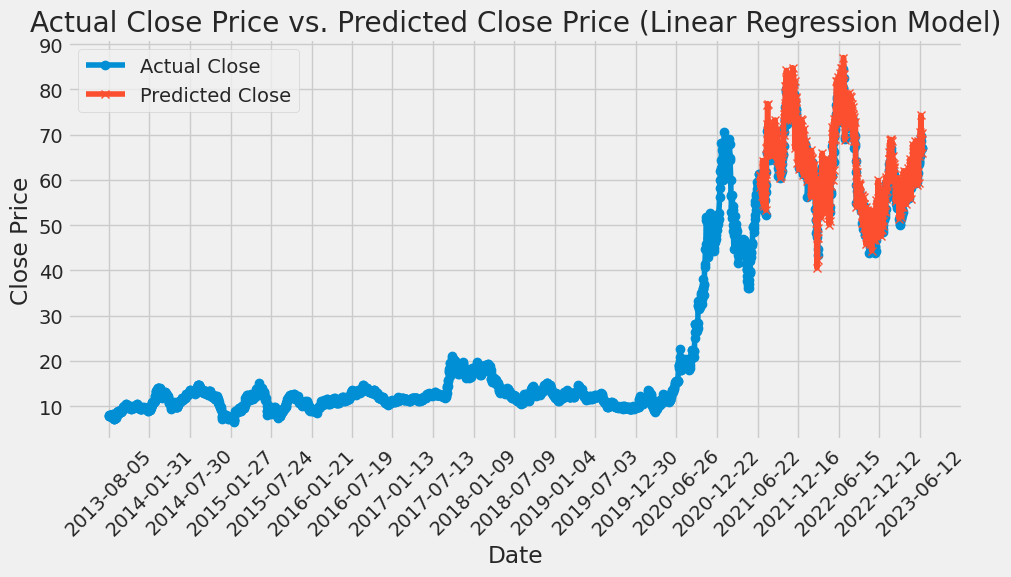

In [ ]:
# Visualize actual values vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual Close', marker='o')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Close', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Close Price vs. Predicted Close Price (Linear Regression Model)')
plt.legend()
plt.xticks(data.index[::int(len(data)/20)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

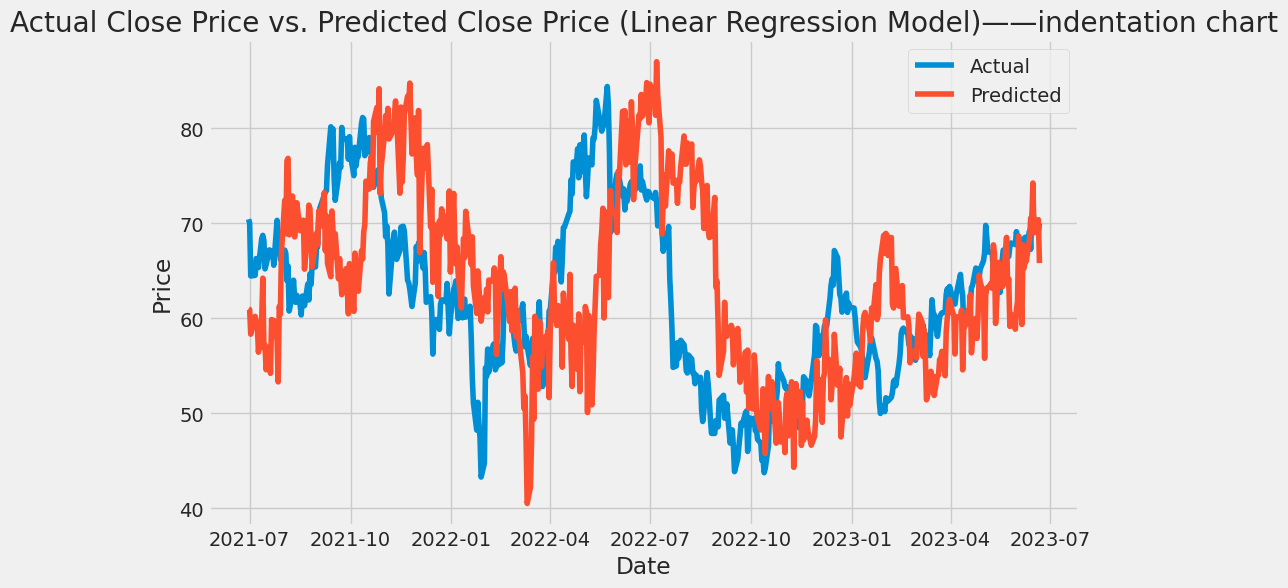

In [ ]:
# Visualize actual values vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, predictions, label='Predicted')
plt.legend()
plt.title('Actual Close Price vs. Predicted Close Price (Linear Regression Model)——indentation chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

RMSE: 10.094605362723478


# Model construction + model optimization tuning parameters + model prediction


use one stock to construct the lstm model

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
import warnings

In [2]:
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

Load Data

In [3]:
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)
df = yf.download("BYDDY",start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-05,7.840000,7.840000,7.700000,7.710000,7.480309,42600
2013-08-06,8.010000,8.150000,7.970000,8.000000,7.761670,37400
2013-08-07,7.980000,7.980000,7.850000,7.890000,7.654947,18900
2013-08-08,8.050000,8.050000,7.900000,7.950000,7.713159,24600
2013-08-09,7.940000,8.010000,7.940000,8.000000,7.761670,47700
...,...,...,...,...,...,...
2023-07-28,70.000000,70.629997,69.199997,70.529999,70.529999,275900
2023-07-31,71.699997,71.699997,70.279999,71.349998,71.349998,278300
2023-08-01,71.089996,71.089996,70.150002,70.400002,70.400002,102200


Data preprocessing

In [4]:
price = df[['Adj Close']]

# Scale the data with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
price['Adj Close'] = scaler.fit_transform(price['Adj Close'].values.reshape(-1,1))

# Split the data into train and test sets
train_size = int(len(price) * 0.8)
train_data, test_data = price.iloc[:train_size], price.iloc[train_size:]

# Convert data to the format expected by LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   # i to i + time_step data
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # i + time_step data (the next data)
    return np.array(dataX), np.array(dataY)


<ipython-input-4-6b34e3b7a71d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Adj Close'] = scaler.fit_transform(price['Adj Close'].values.reshape(-1,1))


In [5]:
# use a time step for sequence creation
time_step = 100
X_train, y_train = create_dataset(train_data.values, time_step)
X_test, y_test = create_dataset(test_data.values, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((1912, 100, 1), (1912,), (403, 100, 1), (403,))

Load a simple LSTM model

In [6]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [7]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.2))  # Add dropout with a probability of 0.2

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a probability of 0.2

model.add(LSTM(50))
model.add(Dropout(0.2))  # Add dropout with a probability of 0.2

model.add(Dense(1, activation='relu'))


# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
60/60 [==============================] - 36s 451ms/step - loss: 0.0041 - mape: 1513.7290 - val_loss: 0.0062 - val_mape: 9.0738
Epoch 2/10
60/60 [==============================] - 12s 198ms/step - loss: 0.0016 - mape: 7948.2480 - val_loss: 0.0094 - val_mape: 11.7706
Epoch 3/10
60/60 [==============================] - 14s 239ms/step - loss: 0.0012 - mape: 9249.1641 - val_loss: 0.0025 - val_mape: 5.7678
Epoch 4/10
60/60 [==============================] - 12s 200ms/step - loss: 0.0010 - mape: 19.7638 - val_loss: 0.0042 - val_mape: 7.5226
Epoch 5/10
60/60 [==============================] - 12s 199ms/step - loss: 9.8758e-04 - mape: 18.4543 - val_loss: 0.0025 - val_mape: 5.7944
Epoch 6/10
60/60 [==============================] - 12s 202ms/step - loss: 0.0012 - mape: 1396.9529 - val_loss: 0.0023 - val_mape: 5.6151
Epoch 7/10
60/60 [==============================] - 13s 213ms/step - loss: 7.6783e-04 - mape: 1952.0079 - val_loss: 0.0022 - val_mape: 5.4611
Epoch 8/10
60/60 [===========

Tune in to find the best model

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import os

# Define the parameters for the grid
units = [50, 100]

# Keep other parameters constant
dropout_rate = 0.2
batch_size = 32
layer = 3
activation = 'relu'
optimizer = 'Adam'
epoch = 5

# Create a dictionary to store the results
results = {}

# Iterate over the parameters
for unit in units:
    # Check if the model file exists
    if os.path.exists('best_model.h5'):
        # Load the existing model
        model = load_model('best_model.h5')
    else:
        # Define a new model
        model = Sequential()
        model.add(LSTM(unit, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(dropout_rate))
        for i in range(layer - 1):
            model.add(LSTM(unit, return_sequences=True))
            model.add(Dropout(dropout_rate))
        model.add(LSTM(unit))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation='relu'))
        # Compile the model
        model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mape'])

    # Define the checkpoint
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_mape', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [checkpoint]

    # Fit the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=batch_size, callbacks=callbacks_list, verbose=0)



Epoch 1: val_mape improved from inf to 7.89539, saving model to best_model.h5

Epoch 2: val_mape did not improve from 7.89539

Epoch 3: val_mape did not improve from 7.89539

Epoch 4: val_mape did not improve from 7.89539

Epoch 5: val_mape did not improve from 7.89539

Epoch 1: val_mape improved from inf to 8.50514, saving model to best_model.h5

Epoch 2: val_mape improved from 8.50514 to 7.74099, saving model to best_model.h5

Epoch 3: val_mape improved from 7.74099 to 7.24760, saving model to best_model.h5

Epoch 4: val_mape did not improve from 7.24760

Epoch 5: val_mape did not improve from 7.24760


Load Best model

In [9]:
# Load the best model
best_model = load_model('best_model.h5')

Test Model

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

# Make prediction
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

13/13 [==============================] - 1s 93ms/step
20.936751856487962
61.65241364174576


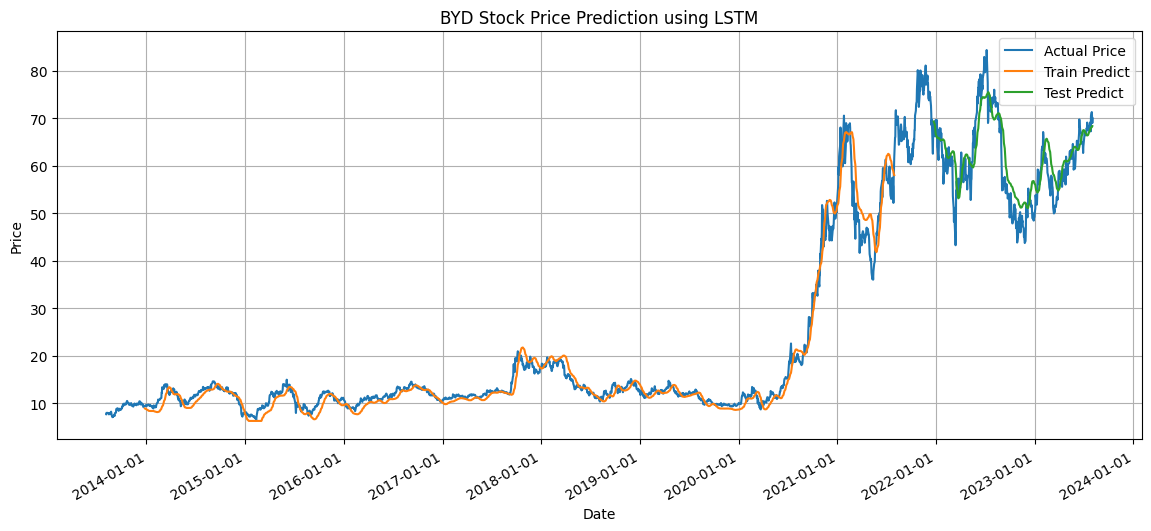

In [12]:
# Plotting
look_back=100
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(price)-1, :] = test_predict

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))

# Plot baseline and predictions
ax.plot(df.index, df['Close'], label='Actual Price')
ax.plot(df.index, trainPredictPlot, label='Train Predict')
ax.plot(df.index, testPredictPlot, label='Test Predict')

# Formatting Date
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Adding Grid
ax.grid(True)

# Adding labels
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BYD Stock Price Prediction using LSTM')
plt.legend()

# Show the figure
plt.show()

Prediction

In [13]:
# Define the number of future days
future_days = 30

# Create a new dataframe for the predictions
new_df = df[['Close']].copy()  # only keep the 'Close' column
new_df = new_df[-time_step:]  # Get the last 'time_step' days

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# Scale the new dataframe
scaled_data = scaler.fit_transform(new_df)

# Initialize an empty list for the predictions
predictions = []

# Make predictions for the future days
for i in range(future_days):
    last_100_days_scaled = scaled_data[-time_step:]
    last_100_days_scaled = last_100_days_scaled.reshape(-1, time_step, 1)  # Reshape the data
    predicted_price = model.predict(last_100_days_scaled)  # Predict the price
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)  # Undo the scaling
    predictions.append(predicted_price_unscaled.flatten()[0])

    # Add predicted price to scaled_data for next prediction
    scaled_data = np.append(scaled_data, predicted_price)
    scaled_data = scaled_data[-time_step:]

# Create a new dataframe for the predicted prices
predicted_prices_df = pd.DataFrame(predictions, columns=['Predicted Price'])

# Create a date range for the future days
future_dates = pd.date_range(start=df.index[-1], periods=future_days)

# Add the future dates to the dataframe
predicted_prices_df['Date'] = future_dates
predicted_prices_df.set_index('Date', inplace=True)

predicted_prices_df


1/1 [==============================] - 0s 42ms/step


,Predicted Price
Date,
2023-08-03,66.732872
2023-08-04,66.818420
2023-08-05,66.850288
2023-08-06,66.811501
2023-08-07,66.697433
2023-08-08,66.513657
2023-08-09,66.272354
2023-08-10,65.988907
2023-08-11,65.679001


Packaged Data Preprocessing

In [14]:
# Function to process the data
def process_data(stock_data, time_step):
    # Select the 'Adj Close' column and scale it
    price = stock_data[['Adj Close']]
    scaler = MinMaxScaler(feature_range=(0, 1))
    price['Adj Close'] = scaler.fit_transform(price['Adj Close'].values.reshape(-1,1))

    # Split the data into train and test sets
    train_size = int(len(price) * 0.8)
    train_data, test_data = price.iloc[:train_size], price.iloc[train_size:]

    # Convert data to the format expected by LSTM
    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), 0]   # i to i + time_step data
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])  # i + time_step data (the next data)
        return np.array(dataX), np.array(dataY)

    X_train, y_train = create_dataset(train_data.values, time_step)
    X_test, y_test = create_dataset(test_data.values, time_step)

    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

    return X_train, y_train, X_test, y_test, scaler



In [15]:
# Load the best model
best_model = load_model('best_model.h5')

Packaged Prediction

In [16]:
# Function to predict the future stock price
def predict_future_stock_price(df, time_step, model, future_days, scaler):
    # Create a new dataframe for the predictions
    new_df = df[['Adj Close']].copy()  # keep the 'Adj Close' column
    new_df = new_df[-time_step:]  # Get the last 'time_step' days

    # Scale the new dataframe
    scaled_data = scaler.transform(new_df)

    # Initialize an empty list for the predictions
    predictions = []

    # Make predictions for the future days
    for i in range(future_days):
        last_100_days_scaled = scaled_data[-time_step:]
        last_100_days_scaled = last_100_days_scaled.reshape(-1, time_step, 1)  # Reshape the data
        predicted_price = model.predict(last_100_days_scaled)  # Predict the price
        predicted_price_unscaled = scaler.inverse_transform(predicted_price)  # Undo the scaling
        predictions.append(predicted_price_unscaled.flatten()[0])

        # Add predicted price to scaled_data for next prediction
        scaled_data = np.append(scaled_data, predicted_price)
        scaled_data = scaled_data[-time_step:]

    return predictions


Download the data And Predict 5 stocks

In [17]:
# List of stock symbols
stocks_symbols = ["BYDDY", "BMWYY", "TSLA", "TM", "VWAGY"]

# Dictionary to store the stock data
stocks_data = {}

# Dictionary to store the predictions
stocks_predictions = {}

# Download the stock data and make predictions
for symbol in stocks_symbols:
    stocks_data[symbol] = yf.download(symbol, start, end)
    X_train, y_train, X_test, y_test, scaler = process_data(stocks_data[symbol], time_step)
    stocks_predictions[symbol] = predict_future_stock_price(stocks_data[symbol], time_step, best_model, future_days, scaler)

# Convert the predictions dictionary to a dataframe
predicted_prices_df = pd.DataFrame(stocks_predictions)

# Create a date range for the future days
future_dates = pd.date_range(start=stocks_data[stocks_symbols[0]].index[-1], periods=future_days)

# Add the future dates to the dataframe
predicted_prices_df['Date'] = future_dates
predicted_prices_df.set_index('Date', inplace=True)

predicted_prices_df

[*********************100%***********************]  1 of 1 completed


<ipython-input-14-80538520b8cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Adj Close'] = scaler.fit_transform(price['Adj Close'].values.reshape(-1,1))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 77ms/step


<ipython-input-14-80538520b8cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Adj Close'] = scaler.fit_transform(price['Adj Close'].values.reshape(-1,1))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 41ms/step


<ipython-input-14-80538520b8cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Adj Close'] = scaler.fit_transform(price['Adj Close'].values.reshape(-1,1))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 44ms/step


<ipython-input-14-80538520b8cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Adj Close'] = scaler.fit_transform(price['Adj Close'].values.reshape(-1,1))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 66ms/step


<ipython-input-14-80538520b8cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Adj Close'] = scaler.fit_transform(price['Adj Close'].values.reshape(-1,1))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step


,BYDDY,BMWYY,TSLA,TM,VWAGY
Date,,,,,
2023-08-03,68.660019,37.795158,285.069427,170.379791,17.875540
2023-08-04,68.786156,37.748615,283.377197,171.132736,17.787613
2023-08-05,68.894142,37.668243,282.003418,171.906952,17.712219
2023-08-06,68.976624,37.556183,281.093842,172.679672,17.662817
2023-08-07,69.029922,37.417423,280.721863,173.433884,17.648340
2023-08-08,69.053780,37.258480,280.892761,174.158859,17.672670
2023-08-09,69.050652,37.086315,281.558472,174.849182,17.735212
2023-08-10,69.024605,36.907486,282.637054,175.503708,17.832073
2023-08-11,68.980537,36.727631,284.031036,176.124100,17.957376


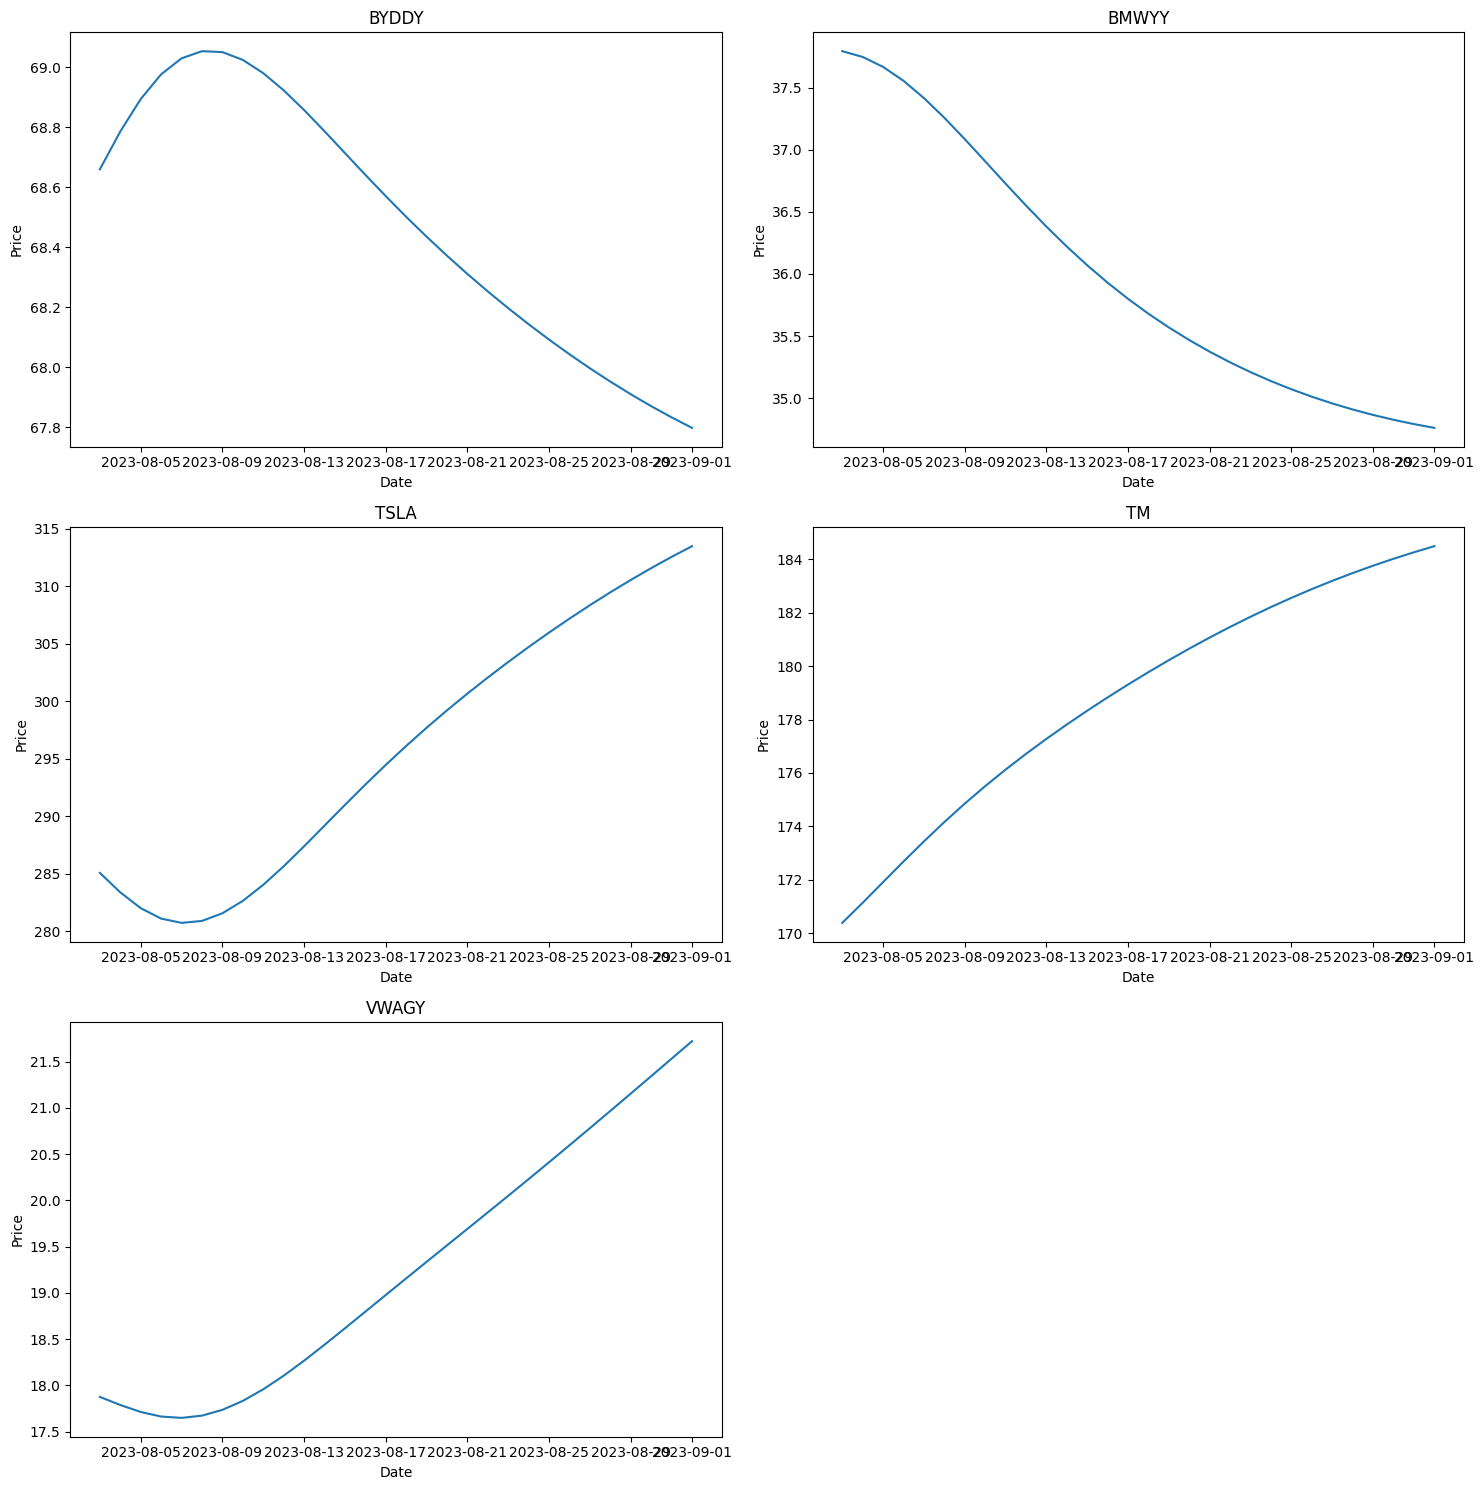

In [18]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Remove the extra subplot
fig.delaxes(axes[-1])

# Plot the data
for ax, (symbol, predictions) in zip(axes, predicted_prices_df.items()):
    ax.plot(predicted_prices_df.index, predictions)
    ax.set_title(symbol)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

# Automatically adjust subplot parameters to give specified padding
fig.tight_layout()

# Show the plot
plt.show()


# Asset Allocation


In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
tickers = {
    'BYDDY','TM','BMWYY','TSLA','VWAGY'}
data = yf.download(tickers,start='2013-07-25', end='2023-07-25')['Close']
data.head()

[*********************100%***********************]  5 of 5 completed


,BMWYY,BYDDY,TM,TSLA,VWAGY
Date,,,,,
2013-07-25,32.980000,8.26,127.550003,8.271333,22.290001
2013-07-26,33.000000,8.10,124.489998,8.626000,22.040001
2013-07-29,32.770000,7.97,120.250000,8.974667,22.254999
2013-07-30,32.930000,7.99,122.589996,8.782667,22.698000
2013-07-31,32.599998,7.75,121.900002,8.952000,22.879999


In [21]:
r_log = np.log(data/data.shift(1))
r_log = r_log.dropna()
r_log.head()

,BMWYY,BYDDY,TM,TSLA,VWAGY
Date,,,,,
2013-07-26,0.000606,-0.019561,-0.024283,0.041985,-0.011279
2013-07-29,-0.006994,-0.016180,-0.034652,0.039625,0.009708
2013-07-30,0.004871,0.002506,0.019273,-0.021626,0.019710
2013-07-31,-0.010072,-0.030498,-0.005644,0.019097,0.007986
2013-08-01,-0.008626,0.036736,0.034984,0.009413,0.019477


In [22]:
def annual_rets(returns, periods):
    mean = ((1+returns).prod())**(1/returns.shape[0])-1
    return (1+mean)**periods-1

In [23]:
def annual_std(returns, periods):
    return returns.std()*np.sqrt(periods)

In [24]:
def annual_sharpe(returns,periods,riskfree_rate):
    annual_r = annual_rets(returns,periods)
    annual_v = annual_std(returns,periods)
    return(annual_r-riskfree_rate)/annual_v

In [25]:
sharpe = annual_sharpe(r_log,252,0.054)
sharpe

BMWYY   -0.264735
BYDDY    0.084609
TM      -0.240408
TSLA     0.274980
VWAGY   -0.399040
dtype: float64

<Axes: >

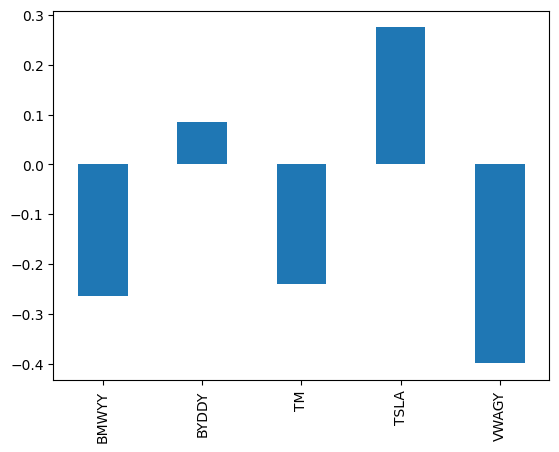

In [26]:
sharpe.plot.bar()

In [27]:
annual_rets = annual_rets(r_log,252)
annual_vols = annual_std(r_log,252)
annual_cov =np.cov(r_log,rowvar=False)*252
annual_rets,annual_vols,annual_cov

(BMWYY   -0.024017
 BYDDY    0.095693
 TM       0.003096
 TSLA     0.208741
 VWAGY   -0.091916
 dtype: float64,
 BMWYY    0.294700
 BYDDY    0.492779
 TM       0.211740
 TSLA     0.562734
 VWAGY    0.365668
 dtype: float64,
 array([[0.08684811, 0.04346195, 0.03109801, 0.04730491, 0.07620575],
        [0.04346195, 0.24283141, 0.02933426, 0.07913823, 0.05012136],
        [0.03109801, 0.02933426, 0.04483381, 0.02989628, 0.03422436],
        [0.04730491, 0.07913823, 0.02989628, 0.31666959, 0.05619811],
        [0.07620575, 0.05012136, 0.03422436, 0.05619811, 0.13371275]]))

In [29]:
def portfolio_return(weights,returns):
    return weights.T @ returns

In [30]:
def portfolio_vol(weights,comatrix):
    return np.sqrt(weights.T @ comatrix @ weights)

In [31]:
port_ret_5 = []
port_vol_5 = []
for p in np.arange(100000):
    weights = np.random.random_sample(5)
    weights = weights/np.sum(weights)
    port_ret_5.append(portfolio_return(weights,annual_rets))
    port_vol_5.append(portfolio_vol(weights,annual_cov))
ef_5 = pd.DataFrame({"RR":port_ret_5,"Vol":port_vol_5})

In [32]:
ef_5

,RR,Vol
0,0.023523,0.273647
1,0.044344,0.299148
2,0.041255,0.287437
3,0.073095,0.290845
4,0.078377,0.320765
...,...,...
99995,0.045116,0.268687
99996,-0.031268,0.269001
99997,-0.013350,0.240553
99998,0.039331,0.246313


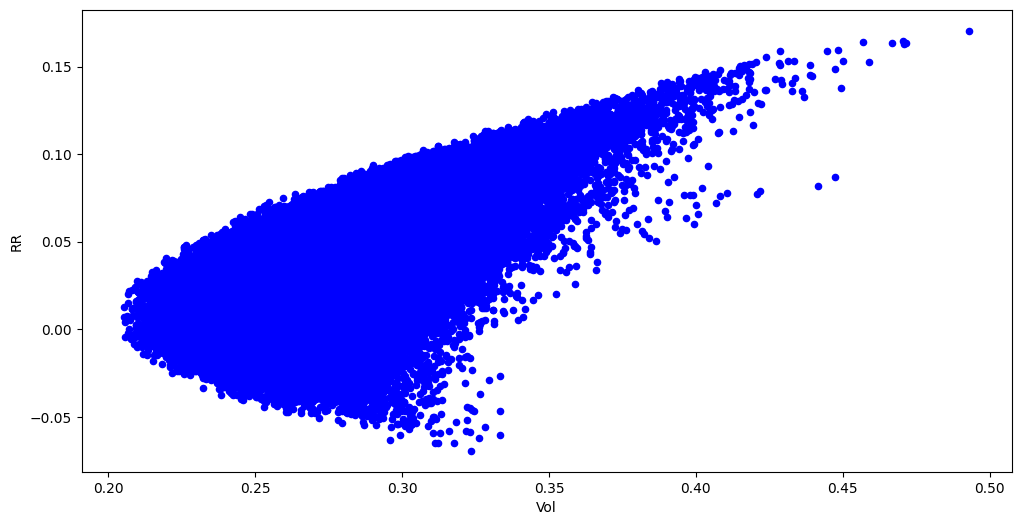

In [33]:
ax_5 = ef_5.plot.scatter(x="Vol", y="RR", figsize=(12,6),color="b")

In [34]:
def minimize_vol(target_ret, rets,comatrix):
    from scipy.optimize import minimize
    n = rets.shape[0]
    initial_guess = np.repeat(1/n, n)
    bounds = ((0,1),)*n
    weights_sum_1 = {'type':'eq','fun':lambda weights: np.sum(weights)-1}
    return_target = {'type':'eq','args':(annual_rets,),'fun':lambda weights,rets:portfolio_return(weights,rets)-target_ret}
    weights = minimize(portfolio_vol, initial_guess, args=(comatrix,),method='SLSQP',bounds=bounds,constraints=(weights_sum_1,return_target))
    return weights.x

In [35]:
def optimal_weights (points, rets, cov):
    target_rs = np.linspace(rets.min(), rets.max () , points)
    weights = [minimize_vol(target_ret, rets, cov) for target_ret in target_rs]
    return weights

In [36]:
def plot_ef(points, rets, cov):
    portrets_5min = []
    portvols_5min = []
    weights = optimal_weights (points, rets, cov)
    for w in weights:
        portrets_5min.append (portfolio_return(w,rets))
        portvols_5min.append (portfolio_vol(w, cov))
    ef = pd.DataFrame ( {"RR":portrets_5min,"Vol":portvols_5min})
    return ef.plot.line(x="Vol",y="RR",style="-")

<Axes: xlabel='Vol'>

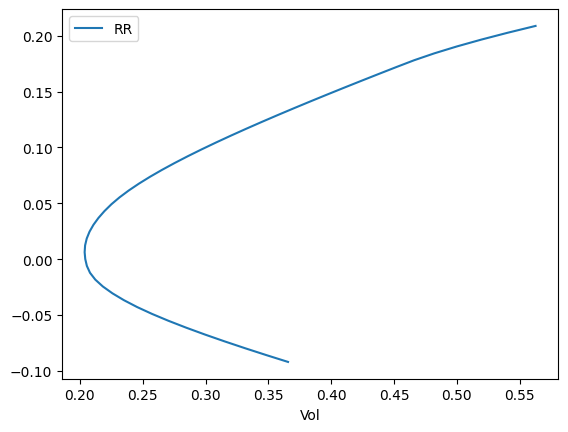

In [37]:
plot_ef(50,annual_rets,annual_cov)

In [38]:
def GMVP(cov):
    from scipy.optimize import minimize
    n = cov.shape[0]
    initial_guess = np.repeat(1/n, n)
    bounds = ((0,1),)*n
    weights_sum_1 = {'type':'eq','fun':lambda weights: np.sum(weights)-1}
    weights = minimize(portfolio_vol, initial_guess, args=(cov,),method='SLSQP',bounds=bounds,constraints=(weights_sum_1))
    return weights.x

In [39]:
GMVP_w = GMVP(annual_cov)
ret_GMVP = portfolio_return(GMVP_w, annual_rets)
vol_GMVP = portfolio_vol(GMVP_w, annual_cov)

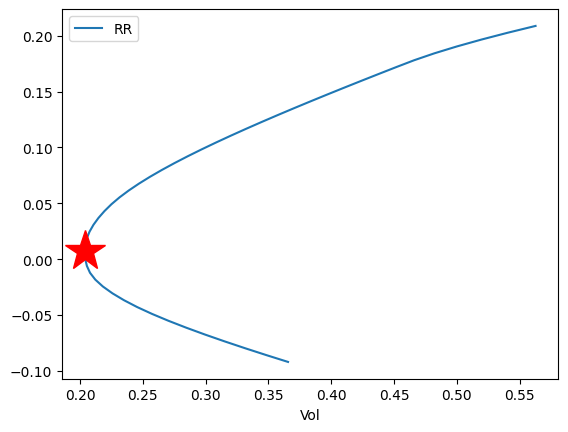

In [40]:
ax = plot_ef(50,annual_rets,annual_cov)
ax.plot(vol_GMVP,ret_GMVP,color="r",marker="*",markersize=30)

In [41]:
def maximum_SR(risk_free_rate, rets, cov):
    from scipy.optimize import minimize
    n = rets.shape[0]
    initial_guess = np.repeat(1/n, n)
    bounds = ((0,1),)*n
    weights_sum_1 = {'type':'eq','fun':lambda weights: np.sum(weights)-1}

    def neg_sharpe(weights, risk_free_rate, rets, cov):
        r = portfolio_return(weights,rets)
        v = portfolio_vol(weights,cov)
        return -(r-risk_free_rate)/v

    weights = minimize(neg_sharpe, initial_guess, args=(risk_free_rate, rets, cov),method='SLSQP',bounds=bounds,constraints=(weights_sum_1))
    return weights.x

In [42]:
rfr=0.054
weights_maximum_SR = maximum_SR(rfr, annual_rets, annual_cov)
weights_maximum_SR

array([3.25051391e-17, 2.73052857e-02, 0.00000000e+00, 9.72694714e-01,
       3.63364728e-18])

In [43]:
r_maximum_SR = portfolio_return(weights_maximum_SR, annual_rets)
v_maximum_SR = portfolio_vol(weights_maximum_SR,annual_cov)

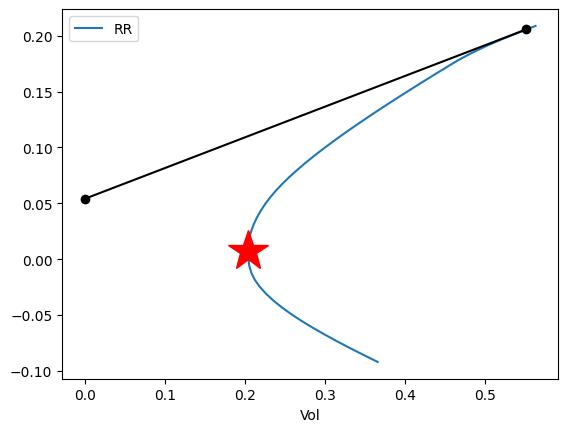

In [44]:
ax_last = plot_ef(50,annual_rets,annual_cov)
ax_last.plot(vol_GMVP,ret_GMVP,color="r",marker="*",markersize=30)
CML_x = [0,v_maximum_SR]
CML_y = [rfr, r_maximum_SR]

ax_last.plot(CML_x, CML_y, color='k',marker='o')